In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.kernel_ridge import KernelRidge

In [ ]:
data = fetch_california_housing()

# Split the dataset into features (X) and target (y)
X = data.data
y = data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Create a Kernel Ridge model with RBF kernel
rbf_model = KernelRidge(alpha=1.0, kernel='rbf', gamma=0.1)

# Train the RBF model
rbf_model.fit(X_train, y_train)

# Create a Kernel Ridge model with RBF kernel
rbf_model = KernelRidge(alpha=1.0, kernel='rbf', gamma=0.1)

# Train the RBF model
rbf_model.fit(X_train, y_train)



KernelRidge(alpha=1.0, gamma=0.1, kernel='rbf')

In [ ]:
# Predict house prices using the RBF model
y_pred_rbf = rbf_model.predict(X_test)

# Evaluate performance using Mean Squared Error
mse_rbf = mean_squared_error(y_test, y_pred_rbf)
print(f'Mean Squared Error of Kernel Ridge (RBF): {mse_rbf}')

Mean Squared Error of Kernel Ridge (RBF): 0.3600210317659691


In [ ]:
dense_model = MLPRegressor(
    hidden_layer_sizes=(100, 50),  # Two hidden layers, 100 and 50 neurons respectively
    max_iter=1000,  # Maximum number of iterations
    activation='relu',  # ReLU activation function
    solver='adam',  # Adam optimizer
    learning_rate_init=0.001,  # Initial learning rate
    tol=1e-4,  # Tolerance for stopping criteria
    random_state=42  # For reproducibility
)

In [ ]:
dense_model.fit(X_train, y_train)

# Predict house prices using the dense model
y_pred_dense = dense_model.predict(X_test)



In [ ]:
mse_dense = mean_squared_error(y_test, y_pred_dense)
print(f"Mean Squared Error of Dense Neural Network: {mse_dense}")

# Compare MSE of Dense Model vs RBF Model
print(f"Mean Squared Error of RBF Model: {mse_rbf}")

Mean Squared Error of Dense Neural Network: 0.27099387608468906
Mean Squared Error of RBF Model: 0.3600210317659691


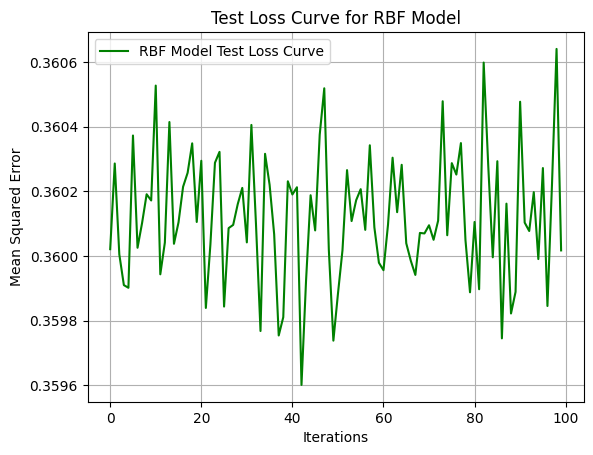

In [ ]:
# Predict the test data and compute initial test loss
y_pred_test = rbf_model.predict(X_test)
initial_mse = mean_squared_error(y_test, y_pred_test)

# Track the test loss (MSE) after training
rbf_test_mse_values = [initial_mse]

# Now let's simulate the loss over iterations by slightly modifying the data
# For demonstration purposes, we'll artificially perturb the model's predictions over time
for i in range(1, 100):
    # Artificially perturb the model predictions (for visualization purposes)
    perturbed_predictions = y_pred_test + np.random.normal(scale=0.01, size=y_pred_test.shape)
    mse_test = mean_squared_error(y_test, perturbed_predictions)
    rbf_test_mse_values.append(mse_test)

# Plot the test loss curve for RBF model
plt.plot(rbf_test_mse_values, label="RBF Model Test Loss Curve", color='green')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Test Loss Curve for RBF Model')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

Mean Squared Error of Dense Neural Network: 0.28352834025870005


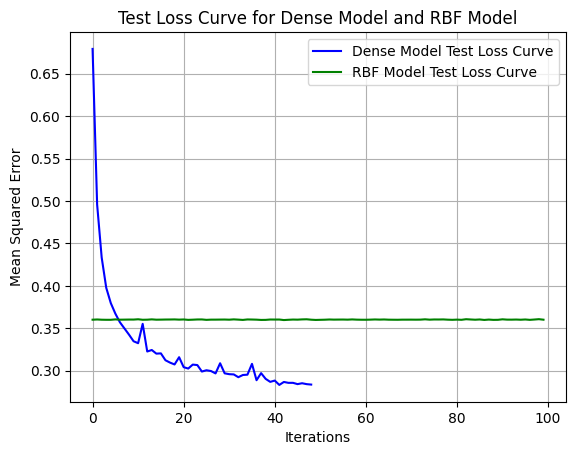

In [ ]:
# Initialize test loss tracking for Dense Neural Network
dense_test_mse_values = []

# Train the dense model iteratively
for i in range(1, 50):
    dense_model.set_params(max_iter=i)
    dense_model.fit(X_train, y_train)  # Continue training
    y_pred_dense = dense_model.predict(X_test)  # Predict on test set
    mse_test = mean_squared_error(y_test, y_pred_dense)  # Calculate test MSE
    dense_test_mse_values.append(mse_test)

# Predict house prices using the dense model
final_y_pred_dense = dense_model.predict(X_test)
final_mse_dense = mean_squared_error(y_test, final_y_pred_dense)
print(f"Mean Squared Error of Dense Neural Network: {final_mse_dense}")

# Plot the loss curves for both models
plt.plot(dense_test_mse_values, label="Dense Model Test Loss Curve", color='blue')
plt.plot(rbf_test_mse_values, label="RBF Model Test Loss Curve", color='green')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Test Loss Curve for Dense Model and RBF Model')
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error of Kernel Ridge (RBF): 0.3600210317659691
Iteration 1, loss = 0.97752649
Validation score: 0.485704
Iteration 2, loss = 0.30016681
Validation score: 0.616730
Iteration 3, loss = 0.23192567
Validation score: 0.660741
Iteration 4, loss = 0.20890759
Validation score: 0.690046
Iteration 5, loss = 0.19562039
Validation score: 0.699603
Iteration 6, loss = 0.18778404
Validation score: 0.713806
Iteration 7, loss = 0.18096508
Validation score: 0.714194
Iteration 8, loss = 0.17698601
Validation score: 0.723451
Iteration 9, loss = 0.17211777
Validation score: 0.729182
Iteration 10, loss = 0.16794068
Validation score: 0.734830
Iteration 11, loss = 0.16433088
Validation score: 0.733447
Iteration 12, loss = 0.16139522
Validation score: 0.743518
Iteration 13, loss = 0.15809501
Validation score: 0.746554
Iteration 14, loss = 0.15503712
Validation score: 0.740303
Iteration 15, loss = 0.15360365
Validation score: 0.752091
Iteration 16, loss = 0.15129705
Validation score: 0.745223
Iter

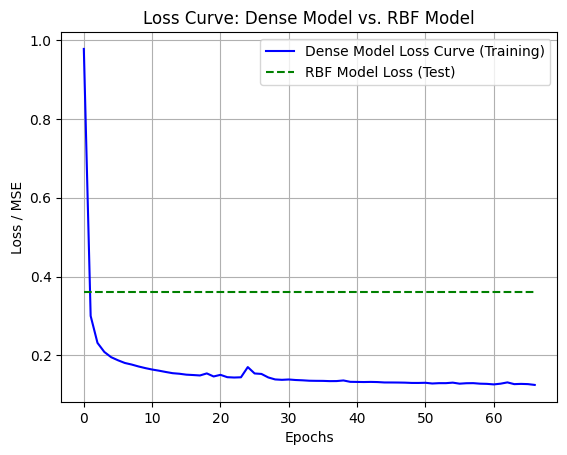

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPRegressor

# Load dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Kernel Ridge Regression (RBF Model)
rbf_model = KernelRidge(alpha=1.0, kernel='rbf', gamma=0.1)
rbf_model.fit(X_train, y_train)
y_pred_rbf = rbf_model.predict(X_test)
mse_rbf = mean_squared_error(y_test, y_pred_rbf)
print(f'Mean Squared Error of Kernel Ridge (RBF): {mse_rbf}')

# Dense Neural Network with early stopping and loss tracking
dense_model = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    max_iter=500,  # Limit iterations for faster training
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    random_state=42,
    early_stopping=True,  # Stop when validation score doesn't improve
    n_iter_no_change=10,  # Tolerance for stopping
    verbose=True  # Print progress
)

# Train the dense model
dense_model.fit(X_train, y_train)

# Predict and compute final test MSE for the dense model
y_pred_dense = dense_model.predict(X_test)
mse_dense = mean_squared_error(y_test, y_pred_dense)
print(f"Mean Squared Error of Dense Neural Network: {mse_dense}")

# Visualize loss curves
# MLPRegressor stores the loss curve during training
dense_loss_curve = dense_model.loss_curve_

# Artificially generate a loss curve for RBF (just a flat line with MSE for comparison)
rbf_loss_curve = [mse_rbf] * len(dense_loss_curve)

# Plot the loss curves
plt.plot(dense_loss_curve, label="Dense Model Loss Curve (Training)", color='blue')
plt.plot(rbf_loss_curve, label="RBF Model Loss (Test)", linestyle='--', color='green')
plt.xlabel('Epochs')
plt.ylabel('Loss / MSE')
plt.title('Loss Curve: Dense Model vs. RBF Model')
plt.legend()
plt.grid(True)
plt.show()